In [94]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [95]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [96]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [97]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [98]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [45]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [99]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [100]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [101]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
most_recent_date

'2017-08-23'

2016-08-22


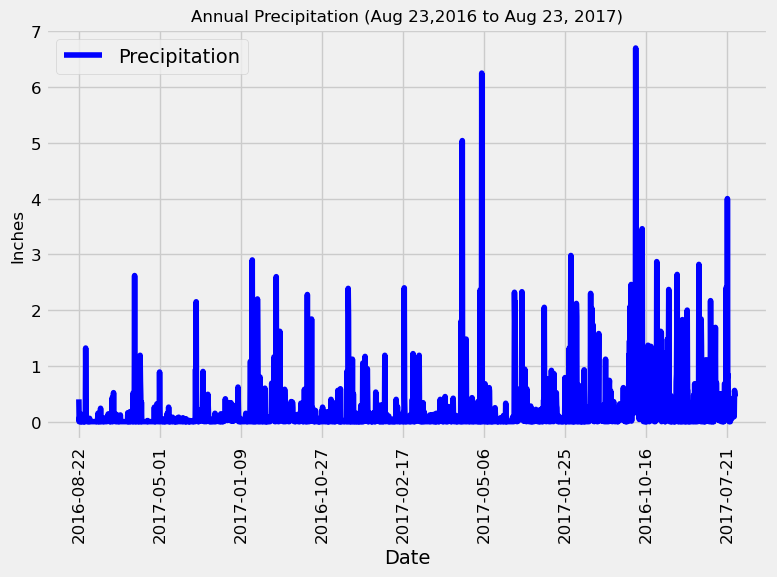

In [135]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
precipitation_query = dt.date(2017,8,23) - dt.timedelta(days=366)
print(precipitation_query)
# Perform a query to retrieve the data and precipitation scores
prior_year_data_query  = (session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= precipitation_query).all()) 

# Save the query results as a Pandas DataFrame. Explicitly set the column names
complete_precipitation_df = pd.DataFrame(prior_year_data_query, columns=["Date","Precipitation"]).set_index('Date').dropna()
complete_precipitation_df

# Sort the dataframe by date
complete_precipitation_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
fontsize = 12
complete_precipitation_df.plot(color = 'blue', fontsize=fontsize, figsize = (8,6), rot = 90)
plt.ylabel('Inches', fontsize=fontsize)
plt.title('Annual Precipitation (Aug 23,2016 to Aug 23, 2017)', fontsize =fontsize)
plt.tight_layout()
plt.show()

In [136]:
# Use Pandas to calculate the summary statistics for the precipitation data
complete_precipitation_df.describe()

,Precipitation
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [103]:
# Design a query to calculate the total number of stations in the dataset
station_count = [session.query(Station.station).count()]
print(station_count)

[9]


In [104]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_station_list = session.query(Measurement.station, func.count(Measurement.station)).\
                      group_by(Measurement.station).\
                      order_by(func.count(Measurement.station).desc()).all()
active_station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [130]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


most_active_data = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281' ).all()
most_active_data




[(54.0, 85.0, 71.66378066378067)]

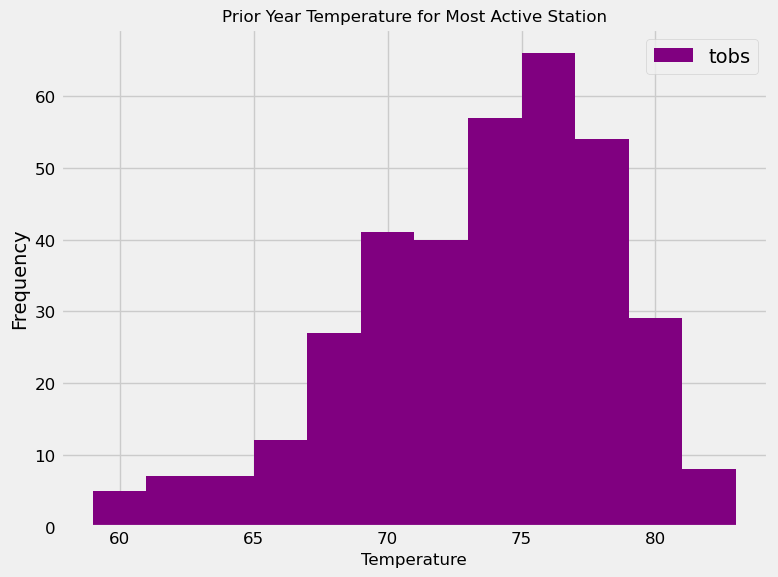

In [137]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_prior_year = (session
             .query(Measurement.station, Measurement.tobs)
             .filter(Measurement.date >= precipitation_query)
             .filter(Measurement.station == 'USC00519281')
             .all())
most_active_prior_year_df = pd.DataFrame(most_active_prior_year)

most_active_prior_year_df.head()

most_active_prior_year_df.plot.hist(figsize = (8,6), fontsize=12, color = 'purple', bins=12, legend=True)
plt.xlabel('Temperature', fontsize =12)
plt.title('Prior Year Temperature for Most Active Station', fontsize=12)
plt.tight_layout()
plt.show()

# Close Session

In [138]:
# Close Session
session.close()